In [22]:
import pandas as pd
test = pd.read_csv('/Users/miji.lee/Downloads/titanic/test.csv')
train = pd.read_csv('/Users/miji.lee/Downloads/titanic/train.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [23]:
# missing values

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
train.duplicated().sum()
# train.drop_duplicates(subset =['PassengerId'], inplace = True)

np.int64(0)

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train[train['Age']<1].head()
# dataset[select rows that meet the condition]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S


In [9]:
train[(train['Age']>=1)& (train['Age']<=2)].head()
# 복수 조건을 두개 만족해야 할때는 dataset[(select rows with condition 1) & (select rows with condition 2)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S
164,165,0,3,"Panula, Master. Eino Viljami",male,1.0,4,1,3101295,39.6875,NaN,S
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.0,1,1,347742,11.1333,NaN,S


In [10]:
# training에서 어떤 피쳐가 예측값에 가장 영향을 많이 미치나 파악해야
# 어떤 상관관계를 맺고 있나 -> heatmap (only continuous. category식 데이터는 어려움)
corr_matrix = train.corr(numeric_only= True)
# 문자열 데이터와 같이 숫자가 없는 데이터간 상관관계는 논리적으로 말이 안됨 -> 수치형만 포함시키도록
# 그 수치형이 ID같은 범주형 데이터라도 어느정도 상관관계가 보여짐

corr_matrix
# pearson correlation. 1에 가까우면 한 피쳐가 증가하면 다른 피쳐도 증가. -1은 역관계

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [11]:
import plotly.express as px

fig_px = px.imshow(corr_matrix, text_auto=True, aspect='auto', 
          title= 'Correlation Heatmap', 
          color_continuous_scale='Blues')

fig_px.show()
#  알고 싶은 것은 survived 이므로 그것과 다른 변수간의 관계를 중점으로 봄
#  fare색상이 진해보임

In [12]:
# 히트맵으로 안나오는 카테고리형 데이터와 survived의 관계를 알아보자 
survived = train[train['Survived']==1]['Sex'].value_counts()
# survived 칼럼== 1 조건을 만족하는 row number를 뽑아서 train 데이터셋으로 새로운 데이터프레임의 sex칼럼을 뽑음
# 갯수 셈
survived

Sex
female    233
male      109
Name: count, dtype: int64

In [13]:
dead = train[train['Survived']==0]['Sex'].value_counts()
dead

Sex
male      468
female     81
Name: count, dtype: int64

In [14]:
df_0 = pd.DataFrame([survived, dead])
df_0
# 만약 'survived', 'dead'처럼 감싸면 
# 0 survived
# 1 dead 처럼 단순한 문자열로 인식.

# survived, dead는 세로로 된 series같이 보이지만 사실은 가로 행으로 구성되있음
# 행데이터들을 pd.DataFrame은 세로로 합친 것

Sex,female,male
count,233,109
count,81,468


In [15]:
df_0.index = ['Survived', 'Dead']
# index: 맨 앞 칼럼
df_0

Sex,female,male
Survived,233,109
Dead,81,468


In [16]:
# 동일하게 concat으로 할수도 있음

df1 = pd.concat([survived, dead], axis =1)
# 1은 옆으로 늘고 0은 위아래로 늘음
df1.columns = ['Survived','Dead']git
print(df1)

SyntaxError: invalid syntax (1781122561.py, line 5)

In [ ]:
result = []  # feature 이름을 key로, DataFrame을 value로
features = ['Sex', 'Pclass']

def fct(feature):
    for feature in features:
        survived =train[train['Survived']==1][feature].value_counts()
        dead = train[train['Survived']==0][feature].value_counts()
        df_graph = pd.DataFrame([survived, dead])
        df_graph.index = ['Survived', 'Dead']
        result.append(df_graph)
        result_df = pd.concat(result, axis =0)
    return result_df

# 함수 실행 후 반환값을 변수에 저장
result_1 = fct(features)


,female,male,1,3,2
Survived,233.0,109.0,NaN,NaN,NaN
Dead,81.0,468.0,NaN,NaN,NaN
Survived,NaN,NaN,136.0,119.0,87.0
Dead,NaN,NaN,80.0,372.0,97.0


In [ ]:
# 같은 내용을 재활용을 위해 함수로 바꾸면

def visualisation(feature):
    survived =train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df_graph = pd.DataFrame([survived, dead])
    df_graph.index = ['Survived', 'Dead']
    return df_graph

In [ ]:
df_visual = visualisation('Sex')
df_visual.head()

Sex,female,male
Survived,233,109
Dead,81,468


In [ ]:
# 절대 빈도는 막대 그래프 (남자에 비해 여자가 더 많이 살았다)
# 상대 빈도는 파이 차트 (여자 중 사망한 %)

fig  = px.bar(df_0,
       x = df_0.index,
       y = df_0.columns,
       barmode = 'group',
        text_auto = True,
       title ='Survived Count by Sex')

fig.show()

In [ ]:
df_pc = visualisation('Pclass')
df_pc

Pclass,1,3,2
Survived,136,119,87
Dead,80,372,97


In [ ]:
fig = px.bar(df_pc,
       x=df_pc.index,
       y=df_pc.columns,
       barmode ='stack',
       text_auto = True,
       title ='Survived Count by Class')
fig.show()

In [ ]:
# 등급을 x축에 놓고 등급별로 확인하려면 plotly 특성상 x축은 인덱스만 쓸 수 있음
# 지금 인덱스는 생존 여부이므로 transpose

df_transpose = df_pc.transpose()
df_transpose

,Survived,Dead
Pclass,,
1,136,80
3,119,372
2,87,97


In [ ]:
fig = px.bar(df_transpose,
       x=df_transpose.index,
       y=df_transpose.columns,
       barmode ='stack',
       text_auto = True,
       title ='Survived Count by Class')
fig.show()

In [ ]:
# 연습: reset_index() 와 melt() 로 롱폼 만들기

df_pc_reset = df_pc.reset_index()
df_pc_reset = df_pc_reset.rename(columns = {'index': 'Survival'})
df_pc_reset.index.name =None
# reset_index(): melt하려면 기준으로 두는 칼럼이 인덱스여서는 안됨. 칼럼이어야 됨.
# 나는 survival 여부를 기준으로 롱폼 만들고 싶은데 df_pc상태에서는 그게 인덱스로 설정되있음
# 그래서 얘를 컬럼으로 빼서 사용될 수 있게 함.

In [ ]:
df_pc_reset = df_pc_reset.melt(id_vars='Survival', var_name='PClass', value_name = 'Number')
df_pc_reset
# melt 는 옆으로 긴 데이터프레임을 아래로 길게 늘어뜨리는 것
# id vars: 어떤 칼럼을 그대로 두고 녹일것인가
# var name: 녹일 열 이름을 담을 컬럼 이름
# value_name: 값이 들어갈 컬럼 이름

,Survival,PClass,Number
0,Survived,1,136
1,Dead,1,80
2,Survived,3,119
3,Dead,3,372
4,Survived,2,87
5,Dead,2,97


In [ ]:
fig = px.pie(data_frame = df_0,
             names = df_0.index, 
             values = 'female',
             title = 'Survival Ratio of Women')

fig.show()

In [ ]:
df_pc

Pclass,1,3,2
Survived,136,119,87
Dead,80,372,97


In [ ]:
# 여러개 파이 차트를 한 화면에 동시에 올린다 -> domain
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Pie(
        labels = df_pc.index,
        values = df_pc[1],
        domain = {'x': [0.0,0.33]}
    )
)

fig.add_trace(
    go.Pie(
        labels = df_pc.index,
        values = df_pc[2],
        domain = {'x': [0.33,0.66]}
    )
)

fig.add_trace(
    go.Pie(
        labels = df_pc.index,
        values = df_pc[3],
        domain = {'x': [0.66,1.0]}
    )
)

fig.update_layout(
    annotations = [dict(
                    text = '1st class',
                    x = 0.165,
                    y=1.1,
                    showarrow =False
                    ),
    dict(text = '3rd class',
         x=0.495,
         y=1.1,
        showarrow =False
),
    dict(text = '2nd class',
         x = 0.83,
         y=1.1,
        showarrow =False
)
            ]
        )

fig.show()


In [ ]:
words = ['apple', 'dog', 'banana', 'cat']
long_words = []

for w in words:
    if len(w)>=4:
        long_words.append(w)

long_words


['apple', 'banana']

In [ ]:
df_eb = visualisation('Embarked')
df_eb_tr = df_eb.transpose()
df_eb_tr

,Survived,Dead
Embarked,,
S,217,427
C,93,75
Q,30,47


In [ ]:
px.bar(data_frame = df_eb_tr,
       x = df_eb_tr.index,
       y = df_eb_tr.columns,
       barmode = 'stack',
       text_auto = True, 
       title = 'Survival by Embarked')

In [ ]:
fig = go.Figure()

fig.add_trace(
    go.Pie(
        labels = df_eb.index,
        values = df_eb.iloc[:,0], 
        # iloc에서 0번째 칼럼은 인덱스가 아니라 1번째 칼럼
        # iloc은 칼럼 순서 정수로만 쓸 수 있음. 칼럼 '이름'으로 선택하려면 loc[:,'name'] 
        domain = {'x': [0.0,0.33]}
    )
)

fig.add_trace(
    go.Pie(
        labels =  df_eb.index,
        values = df_eb.iloc[:,1],
        domain = {'x': [0.33,0.66]}
    )
)

fig.add_trace(
    go.Pie(
        labels = df_eb.index,
        values = df_eb.iloc[:,2],
        domain = {'x': [0.66,1.0]}
    )
)

fig.update_layout(
    annotations = [dict(
                    text = 'S',
                    x = 0.165,
                    y=1.1,
                    showarrow =False
                    ),
    dict(text = 'C',
         x=0.495,
         y=1.1,
        showarrow =False
),
    dict(text = 'Q',
         x = 0.83,
         y=1.1,
        showarrow =False
)
            ]
        )

fig.show()


In [24]:
#  numpy practice

import numpy as np

list1 = [1,2,3]

array1 = np.array(list1)
print(type(array1)) # 1차원. 바깥 []안에 []로 감싸진 것만 어레이로 인식되고, 행과 열을 가진 2차원 matrix로 인식되기 시작 
# 만약 안쪽 []없이 그냥 숫자만 있으면 그건 그냥 숫자 나열(벡터)로 인식되고, 행도 열도 아닌 그냥 1차원
# 2차원이면 (행 1,열 3) 이지만, 1차원이면 걍 (3,)으로 아예 행 자체가 성립이 안됨
# ,만 들어가면 무조건 1차원
print(array1.shape)


array2= np.array([[1,2,3], [4,5,6]])
# 바깥 [] 안의 []는 행 바꿔쓰기를 의미함. [1,2,3]
                                # [4,5,6] -> 행 2개 열 3개 (2,3) 
# 리스트 2개고 2차원
print(type(array2))
print(array2.shape)


array3 = np.array([[1,2,3]])
print(type(array3))
print(array3.shape)
# 처음 예제와 달리 안쪽 []로 한번 더 감싸짐 -> 비로소 행렬로 인식됨.
# [1,2,3] 같이 행 1줄이고 열 3개인 2차원 매트릭스

<class 'numpy.ndarray'>
(3,)
<class 'numpy.ndarray'>
(2, 3)
<class 'numpy.ndarray'>
(1, 3)


In [ ]:
# 데이터 타입 통일

# 원래 array안의 데이터 타입은 무조건 동일해야. [1, 2.3] 이런거 안됨
# 하지만 들어가기 위해 어레이가 자동으로 형변환시켜줌 -> [1.0, 2.3] 처럼
array1 = np.array([1,2, 'test'])
print(array1) # test가 문자열이니 통일시키려고 1,2도 문자열로 변경됨
array1.dtype

['1' '2' 'test']


dtype('<U21')

In [ ]:
# astype

array_int = np.array([1,2,3])
array_int.astype('float64')

array([1., 2., 3.])

In [ ]:
# axis 구분

# 행 방향부터 가장 큰 axis를 부여하고, 역방향으로 내려옴
# [1,2,3] 같이 벡터인 1차원 배열은 애초에 행은 1로 고정이고 열밖에 없으니 axis = 0은 가로방향
# [[1,2,3]
#   [4,5,6]] 같이 2차원 배열은 axis가 0,1밖에 없음. 그 중 axis = 1이 크니, 이것은 가로 방향에 배정되고 세로 방향은 남은 axis = 0\


In [ ]:
# numpy 편하게 생성하기 
# 만들어지는 데이터의 쉐입은 아는데 값은 몰라서 프레임만 필요할 때
array_row =np.arange(10) # 순서대로 연속값 
                        # 10개의 원소. 0칼럼부터 9칼럼까지
print(array_row)
array_row.shape  # 1차원

zero_array = np.zeros([3,2], dtype = 'int32')
print(zero_array)

ones_array = np.ones([3,2], dtype = 'int32')
print(ones_array)

[0 1 2 3 4 5 6 7 8 9]
[[0 0]
 [0 0]
 [0 0]]
[[1 1]
 [1 1]
 [1 1]]


In [ ]:
# ndarray의 차원 , 모양 변경

print(array_row) # 원본: 10개 원소, 1차원
array_row.reshape(5,2) # 2차원 5행 2열로 바꿔줘
array_row.reshape(-1,5) # -1는 가변적. 알아서 행 갯수가 열갯수 5개에 맞게 바꿔달라. 
# 원소가 10개인데 reshape(2,7) 같이 안맞는 갯수로 요청하면 에러


# 1차원으로 바꾸려면 
array2 = np.array([[1,2,3], [4,5,6]])
array2.reshape(-1,) 
#  

[0 1 2 3 4 5 6 7 8 9]


array([1, 2, 3, 4, 5, 6])

In [ ]:
# 단일 indexing

# 1차원

array1 = np.arange(start =1, stop = 10)
print(array1)
print(array1[0]) # array 다음 []은 인덱싱 위치 빼달라는 의미 

print(array1[-1]) # 맨 뒷값
print(array1[-2]) # 맨 뒷값에서 다시 뒤로


# 2차원

array2 = array1.reshape([3,3])
print(array2)
print(array2[0,1]) # 0행 1열

[1 2 3 4 5 6 7 8 9]
1
9
8
[[1 2 3]
 [4 5 6]
 [7 8 9]]
2


In [ ]:
# 슬라이싱 인덱싱 - 연속 인덱싱

# 1차원

print(array1)
array1[0:3] # 0,1,2 인덱스. 마지막은 포함 안함
array1.shape # 여전히 1차원

array1[3:]
array1[:]

# 2차원

print(array2)
array2[0:1,0:2]
array2[:,:]
array2[:2, 1:] # 마지막 숫자 2는 해당되지 않는걸 잊지말라구
array2[:1, 0]

[1 2 3 4 5 6 7 8 9]
[[1 2 3]
 [4 5 6]
 [7 8 9]]


array([1])

In [ ]:
# 불연속 인덱싱

array2[[0,1],2]
array2[[0,1],:1]
array2[[0,1]] # 따로 열값 기재 안됐으면 전체

array1[array1>2] # 조건만 넣는 것도 가능

array([3, 4, 5, 6, 7, 8, 9])

In [ ]:
# 순서 정렬

# 1차원

array1 = np.array([3,1,9,5])
np.sort(array1)
print(array1) # np.sort 는 원본 순서가 바뀌지 않음. 
array_new = np.sort(array1)

array1.sort()
print(array1) # ndarray.sort 역시 정렬은 동일하나, 원본 자체를 바꿈


# 내림차순 정렬

array2 = np.array([3,1,9,5])
np.sort(array2)[::-1]

[3 1 9 5]
[1 3 5 9]
[3 1 9 5]


In [ ]:
# 순서 정렬 2차원

array2 = np.array([[8,12], [7,1]])

np.sort(array2, axis= 1) # 2차원에서 큰 값인 axis=1부터, row방향부터 시작함
np.sort(array2, axis = 0) 

array([[ 7,  1],
       [ 8, 12]])

In [ ]:
# 원본의 인덱스 그대로 순서 정렬 시켜서 반환 

# 오름차순
array1 = np.array([3,1,9,5])
np.argsort(array1)

# 내림차순
np.argsort(array1)[::-1]

# 쓰임새
# key, value로 매핑을 해야 할 때

name_array = np.array(['A', 'B', 'C', 'D', 'E'])
score_array = np.array([78,95,84,98,88])
# 성적 좋은 순으로 사람명 매핑하고 싶은데 그냥 sort하면 순서가 다 틀어짐
sort_score = np.argsort(score_array) # 성적 좋은 순으로 인덱스
name_array[sort_score] # 어레이[숫자] 면 인덱싱 되는 것에 착안해서


array(['A', 'C', 'E', 'B', 'D'], dtype='<U1')

### 판다스

데이터 프레임은 열, 행 둘 다 있는 2차원 데이터셋
시리즈는 열 존재 안하고 행만 있는 1차원. 열 존재하면 2차원 데이터 프레임이 됨.
넘파이의 1차원은 열도 행도 존재 안함.

In [ ]:
train['Pclass'].value_counts()
# pclass가 null 처리된 줄은 세지 않는 것이 문제
# 만약 전체의 70%가 NaN일 경우는 잘못 판단할수도 있음 

AttributeError: 'tuple' object has no attribute 'value_counts'

In [ ]:
# convert DataFrame to numpy

dict= {'col1':[1,11], 'col2':[2,22], 'col3':[3,33]}
df_dict = pd.DataFrame(dict)

df_array = df_dict.values
type(df_array)

# numpy to list

df_array.tolist()

[[1, 2, 3], [11, 22, 33]]

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,practice
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,122.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,138.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,126.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,135.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,135.0


In [ ]:
# 새 컬럼 생성, 수정

train['practice'] = train['Age']+100
train.head()

# 칼럼 삭제

train_drop = train.drop('practice', axis = 1) # 보통 칼럼을 삭제하므로 axis = 1이 흔함
                                            # row 삭제한다면 액시스 0
                                        # 디폴트가 inplace = False
train_drop.head()

# 여러 칼럼 동시에 삭제

train_drop.drop(['Age', 'Parch'], axis = 1, inplace = True) # axis 명시 안하면 오류
print(train_drop.head())


# 행 삭제

train_drop.drop([0,1,2], axis = 0, inplace = True)
print(train_drop.head()) # 3,4,5부터 시작함

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  SibSp  \
0                            Braund, Mr. Owen Harris    male      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female      1   
2                             Heikkinen, Miss. Laina  female      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female      1   
4                           Allen, Mr. William Henry    male      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S  
   PassengerId  Survived  Pclass  \
3            4         1       1   
4       

In [ ]:
# lambda 

lambda_def = lambda x: x**2
lambda_def(3)

# 괄호 안의 숫자가 x 수행식으로 들어가고 리턴됨


# 입력값이 여러개일 경우 map함수

a = [1,2,3]
results = map(lambda x:x**2, a)

list(results)
# map(lambda x: x**2, a) → 계산 준비만 된 상태 (iterator, lazy evaluation)
# 실제로 x**2 계산은 아직 안 일어남. 순회할 때(for나 list() 등) 계산이 수행됨
# list(map(lambda x: x**2, a)) → iterator를 한 번 순회하면서 모든 계산 완료 후 리스트에 담음
# 즉, list()로 감싸는 순간 map 안의 람다 함수가 모든 원소에 적용되고 결과가 리스트에 저장되는 거야.
# for랑 다름

[1, 4, 9]

In [ ]:
# 판다스 컬럼 : apply + lambda

# 한 컬럼에 일률적으로 계산해서 새로운 컬럼 만들 때

train['name_length'] = train['Name'].apply(lambda x: len(x))
train[['Name','name_length']].head()

# 열 하나 잡고 행 따라 내려가는 것이 디폴트 -> axis 별도 설정 안함


# 조건문으로 기존 칼럼 조작하려면

def child_age (x):    
    if x <10 : 
        return 'under 10'
    elif x <30: 
        return 'under 30'
    elif x<50: 
        return 'under 50'
    else: 
        return 'rest'

train['age_cat']= train['Age'].apply(lambda x: child_age(x))
train[['Age', 'age_cat']].head()

,Age,age_cat
0,22.0,under 30
1,38.0,under 50
2,26.0,under 30
3,35.0,under 50
4,35.0,under 50


In [ ]:
# index

indexes = train.index
print(indexes) # 인덱스 객체일 뿐
print(indexes.values) # 객체를 실체적 숫자인 넘파이로 변환

RangeIndex(start=0, stop=891, step=1)
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 

In [ ]:

train.reset_index() # 시리즈 형태를 데이터프레임으로 바꾸기 위해
# 기존 인덱스가 칼럼으로 만들어지고, 새로운 index가 만들어짐

value_counts= train['Pclass'].value_counts()
print(value_counts)
train['Pclass'].value_counts().index
# 원래 인덱스가 3,1,2였음 

train_new_index = value_counts.reset_index(drop= False, inplace = False) 
# 3,1,2가 df 안으로 들어오고 새로 0,1,2 인덱스 생성 
print(train_new_index)

# value_counts를 리셋 인덱스

Pclass
3    491
1    216
2    184
Name: count, dtype: int64
   Pclass  count
0       3    491
1       1    216
2       2    184


In [ ]:
# value_counts를 테이블로 만들 때 reset index 마니 씀

new_train = train['Pclass'].value_counts().reset_index()

new_train.rename(columns = {'count': 'Number'}) # dict형태

,Pclass,Number
0,3,491
1,1,216
2,2,184


In [ ]:
# 필터링

# train[['Name', 'Age']]
# train[0:2]

data = {'Name': ['A', 'B', 'C'], 
        'Year': [10,11,12],
        'Gender': ['M', 'F', 'M']}
df = pd.DataFrame(data, index = ['one', 'two', 'three'])
print(df)


df.iloc[0:1, 0] # iloc는 위치 인덱스이므로 숫자만 들어감 
# df.iloc['one', 1] 에러남

df.iloc[:, -1] # 맨 마지막 컬럼 데이터만 가져와 - 보통 target(답지)가 맨 마지막 칼럼에 있으므로 그거 빼놓고 나눌 때 사용
df.iloc[:, :-1] # 맨 마지막 컬럼만 빼고

      Name  Year Gender
one      A    10      M
two      B    11      F
three    C    12      M


one    A
Name: Name, dtype: object

In [ ]:
# loc

df.loc['one':'three', 'Name'] # 칼럼 기반이므로 칼럼명 적어

# boolean을 더 많이 사용

train[train['Age']>60][['Name', 'Pclass']].head()
train[ (train['Age']>60) & (train['Pclass']==1) ]

,Name,Pclass
33,"Wheadon, Mr. Edward H",2
54,"Ostby, Mr. Engelhart Cornelius",1
96,"Goldschmidt, Mr. George B",1
116,"Connors, Mr. Patrick",3
170,"Van der hoef, Mr. Wyckoff",1


In [ ]:
# sort values

train.sort_values(by = ['Name', 'Pclass'], ascending= True).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,practice,name_length,age_cat
845,846,0,3,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.55,NaN,S,142.0,19,under 50
746,747,0,3,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.25,NaN,S,116.0,27,under 30
279,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.25,NaN,S,135.0,32,under 50
308,309,0,2,"Abelson, Mr. Samuel",male,30.0,1,0,P/PP 3381,24.00,NaN,C,130.0,19,under 50
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.00,NaN,C,128.0,37,under 30


In [ ]:
# group by

train.groupby('Pclass')[['Age', 'Fare']].mean()
train.groupby('Pclass')['Age'].agg(['max', 'min'])
# Pclass 별 age와 sex의 갯수 (distinct는 아님)


# 칼럼마다 다른 집계 방식을 쓰고 싶을 때

train.groupby('Pclass').agg({'Age': 'min', 
                             'Sex': 'count'})


# 한 칼럼에 여러가지 집계 방식을 쓰고 싶을 때 (named group by)

# train.groupby('Pclass').agg({'Age': 'min', 
                            #  'Age': 'count'}) 이렇게 쓰면 뒤에 있는 count만 계산됨
                            
train.groupby('Pclass').agg(age_min = ('Age','min'),
                             age_count = ('Age', 'count'))

# # 이것도 동일
train.groupby('Pclass').agg(
    age_min = pd.NamedAgg(column = 'Age', aggfunc = 'min'),
    age_count = pd.NamedAgg(column = 'Age', aggfunc = 'count')
)

,age_min,age_count
Pclass,,
1,0.92,186
2,0.67,173
3,0.42,355


In [21]:
# 결손 데이터 처리하기

train.isna().sum()

train['Cabin'] = train['Cabin'].fillna('NA') # 임의의 글자 할당
train['Age'] = train['Age'].fillna(train['Age'].mean()) # 평균 넣어줌

train[['Cabin', 'Age']].isna().sum()


# replace 로도 채울 수 있음

train['Age'].replace(np.nan, 'NA')
train['Age'].isna().sum()

NameError: name 'np' is not defined

In [ ]:
train['Sex'] = train['Sex'].replace({'male': 'Man', 'female': 'Woman'})
train['Sex'].value_counts()


# train['Name'].nunique() # 몇건의 고유값이 있는가
# value_counts와 다름. 그건 이름별로 몇명인가 (당연히 1명씩)


Sex
Man      577
Woman    314
Name: count, dtype: int64

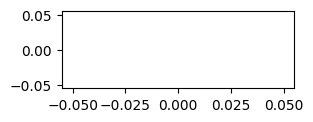

In [34]:
# Matplotlib

import matplotlib.pyplot as plt

plt.figure(figsize = (3,1)) # 전체 캔버스, 액자 느낌
                            # 주로 크기 변경에 사용

ax = plt.axes() # 그림을 그리는 부분 - 이걸 종이 1이라 하자
ax.plot() # 그림을 그리는 특정 종이 1에 그리기 시작. 


# plt.plot() 는 특정 종이 1이 아니라 라이브러리 자체에 지금 활성화된 종이에 그린다.
            # 아직 액자, 종이 안만들었으면 이참에 그냥 만들어줌
            
plt.show() # 현재 활성 figure 전체를 화면에 펼쳐낸다.
            # plt.plot() 만으로는 그리기만 할뿐 화면에 안보여줌.

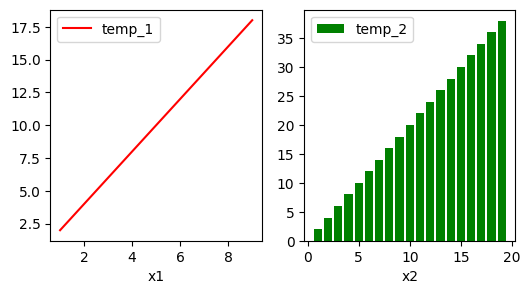

In [ ]:
# 한 figure 캔버스에 여러 그래프 배치할 때 plt.subplots()
x1 = np.arange(1,10)
x2 = np.arange(1,20)
y1 = 2* x1
y2 = 2* x2

fig, ax = plt.subplots(nrows =1, ncols = 2, figsize = (6,3)) # plt.subplots()는 항상 figure, axes 총 2개 반환

ax[0].plot(x1, y1, color = 'red', label = 'temp_1')
ax[1].bar(x2,y2, color = 'green', label = 'temp_2')

ax[0].set_xlabel('x1')
ax[1].set_xlabel('x2')

ax[0].legend()
ax[1].legend()

plt.show()


# 행2 * 열2 이상 배열일때는 ax[0][0], ax[0][1], ax[1][0], ax[1][1]

/var/folders/fp/y1lmwb456hg9tbbtf_dysryc0000gp/T/ipykernel_3745/2403841984.py:8: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.

/var/folders/fp/y1lmwb456hg9tbbtf_dysryc0000gp/T/ipykernel_3745/2403841984.py:13: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



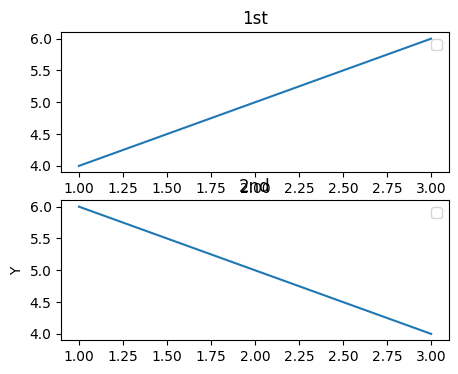

In [ ]:
# ax 이렇게도 쓸 수 있음.

fig, (ax1, ax2) = plt.subplots (nrows = 2,ncols = 1, figsize = (5,4))

ax1.plot([1,2,3], [4,5,6])
ax1.set_title("1st")
ax1.set_xlabel('X')
ax1.legend()

ax2.plot([1,2,3],[6,5,4])
ax2.set_title("2nd")
ax2.set_ylabel('Y')
ax2.legend()

plt.show();

NameError: name 'x' is not defined

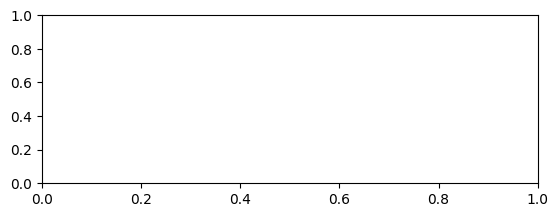

In [ ]:
# 만약 plt.subplot()을 쓴다면:

plt.subplot(2,1,1)    # plt.plot과 마찬가지로 그린 김에 figure 까지 그냥 만들어줌. 위치 확인용
plt.plot(x,y1)        # 그래도 plot 위에 그리긴 해야함

plt.subplot(2,1,2) 
plt.plot(x,y2)

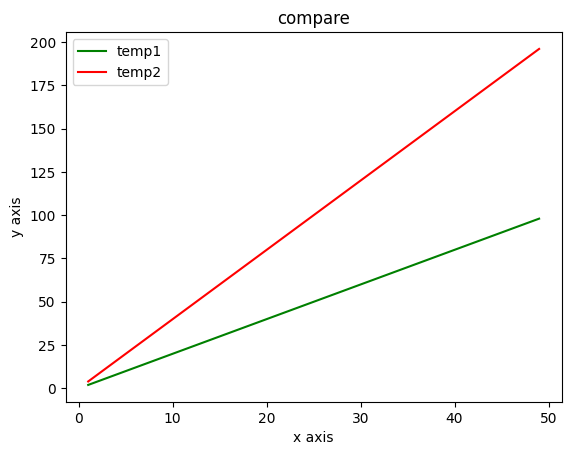

In [154]:
# 한 axes 위에 여러 그래프 배치할 때

x1 = np.arange(1,50)
y1 = x1*2
y2 = x1*4

plt.plot(x1,y1, color = 'green', label = 'temp1') # 현재 axes를 자동으로 생성
plt.plot(x1, y2, color = 'red', label = 'temp2') # 위에서 생성된 액시스를 자동으로 찾음

plt.xlabel('x axis')
plt.ylabel('y axis')

plt.title('compare')
plt.legend()
plt.show()

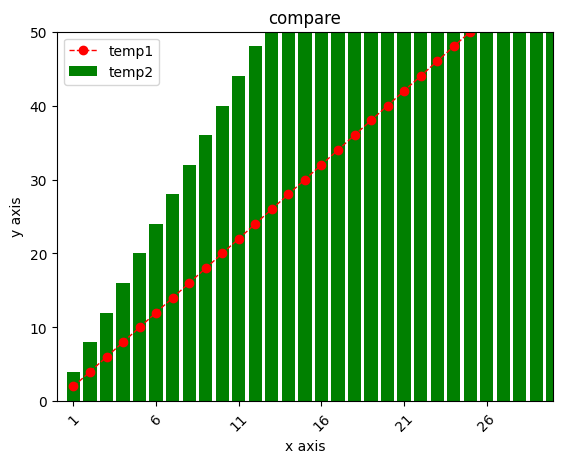

In [158]:
# 바 버전 

plt.plot(x1,y1, color = 'red', marker = 'o', linestyle = 'dashed', linewidth = 1, markersize = 6, label = 'temp1')  
plt.bar(x1, y2, color = 'green', label = 'temp2') 

plt.xlabel('x axis')
plt.ylabel('y axis')

plt.xticks(ticks = np.arange(1,50,5), rotation = 45) # x 값 빽빽할 때 회전

plt.xlim(0,30)
plt.ylim(0,50)

plt.title('compare')
plt.legend()
plt.show()

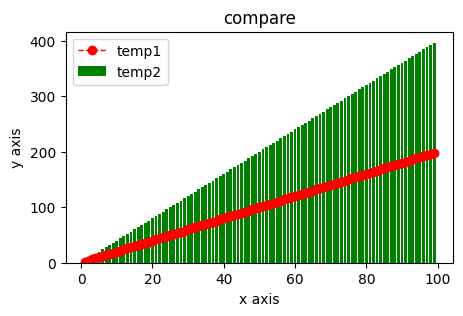

In [ ]:
# 위와 동일한걸 axes 객체 따로 만들고 싶다면 (plt.plot 안쓰고)

plt.figure(figsize = (5,3))
ax = plt.axes()

ax.plot(x1,y1, color = 'red', marker = 'o', linestyle = 'dashed', linewidth = 1, markersize = 6, label = 'temp1')  
ax.bar(x1, y2, color = 'green', label = 'temp2') 

ax.set_xlabel('x axis') # ax 객체에 label 추가하려면 set_ 붙임
ax.set_ylabel('y axis')

ax.set_title('compare') # 타이틀에도 set_
ax.legend() # legend만 예외적으로 set_안붙임
plt.show() # 캔버스를 펼치는거니까 plt


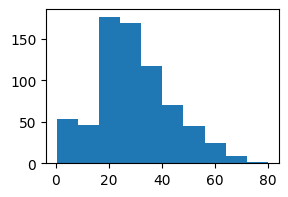

In [80]:
# histogram

plt.figure(figsize = (3,2))
plt.hist(train['Age'])
plt.show()

# train['Age'].hist() 도 가능


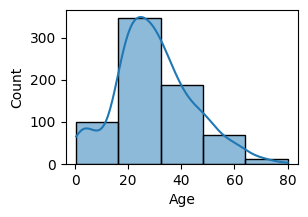

In [90]:
import seaborn as sns

plt.figure(figsize = (3,2)) # seaborn에서도 크기는 figure로 조정
sns.histplot(x = 'Age', data = train, bins = 5, kde = True)

plt.show()

<Axes: xlabel='Pclass', ylabel='count'>

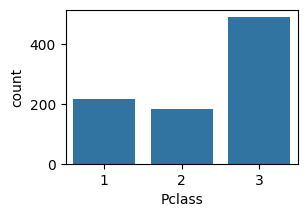

In [ ]:
# 갯수 세기

plt.figure(figsize = (3,2))
sns.countplot(x = 'Pclass', data = train)

# x 축은 카테고리형 데이터 (연속형이면 삐죽삐죽 할거임)

/var/folders/fp/y1lmwb456hg9tbbtf_dysryc0000gp/T/ipykernel_3745/912583172.py:10: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.


/var/folders/fp/y1lmwb456hg9tbbtf_dysryc0000gp/T/ipykernel_3745/912583172.py:13: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.




<Axes: xlabel='Pclass', ylabel='Age'>

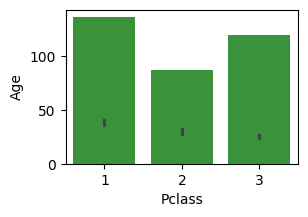

In [ ]:
# 평균/ 총합

plt.figure(figsize = (3,2))
sns.barplot(x = 'Pclass', y = 'Age', data = train)
# x축은 카테고리형, y는 연속형

# y가 Survived같은 카테고리형 이더라도 1,0이니까 평균 내서 생존율을 구해볼수는 있음
# 어쨌든 y는 무조건 숫자

sns.barplot(x = 'Pclass', y = 'Survived', data = train,  ci = False)


# 기본 연산이 평균값이지만 합계로 바꾸려면
sns.barplot(x = 'Pclass', y = 'Survived', data = train,  ci = False, estimator = sum)

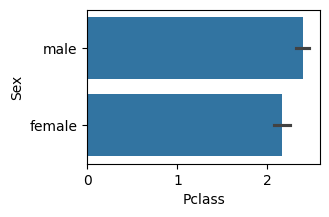

In [ ]:
# 만약 y 숫자가 아니라면

plt.figure(figsize = (3,2))
sns.barplot(x = 'Pclass', y = 'Sex', data = train)

# 맘대로 가로세로 뒤집어서 이거 의미한거 아니냐고 바꿈

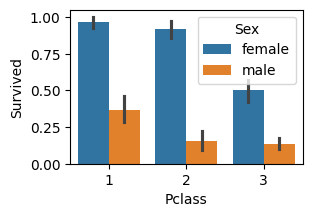

In [105]:
# 작은 granularity로 더 깊게 break down하려면 hue

plt.figure(figsize = (3,2))
sns.barplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = train);

<Axes: xlabel='Age_cat', ylabel='Survived'>

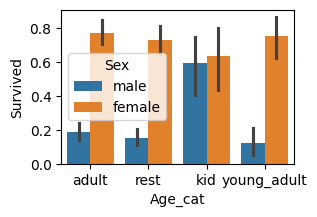

In [119]:
# 만약 연속형 (x축) 별로 숫자를 보고싶다면
# 연속형 값을 카테고리형으로 바꾼 뒤 x축에 넣는다

def age_cat (age):
    if age <10:
        return 'kid'
    elif age <20:
        return 'young_adult'
    elif age <40:
        return 'adult'
    else: 
        return 'rest'
    
train['Age_cat'] = train['Age'].apply(lambda x: age_cat(x))

plt.figure(figsize = (3,2))
sns.barplot(x = 'Age_cat', y = 'Survived', hue = 'Sex', data = train)

<Axes: xlabel='Age_cat', ylabel='Survived'>

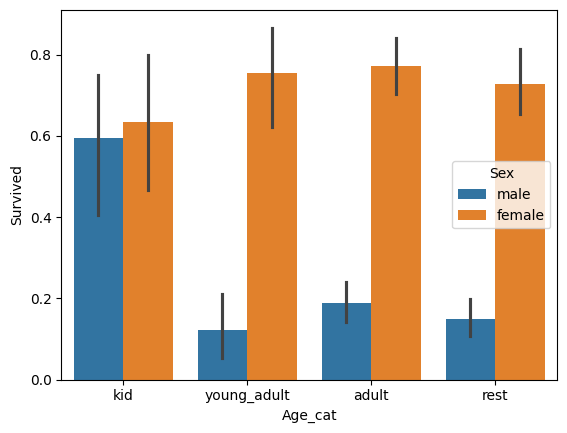

In [ ]:
# x축 순서 정렬하려면

order_cols = ['kid', 'young_adult', 'adult', 'rest']
sns.barplot(x = 'Age_cat', y = 'Survived', hue = 'Sex', data = train, order= order_cols)

<Axes: xlabel='Pclass', ylabel='Age'>

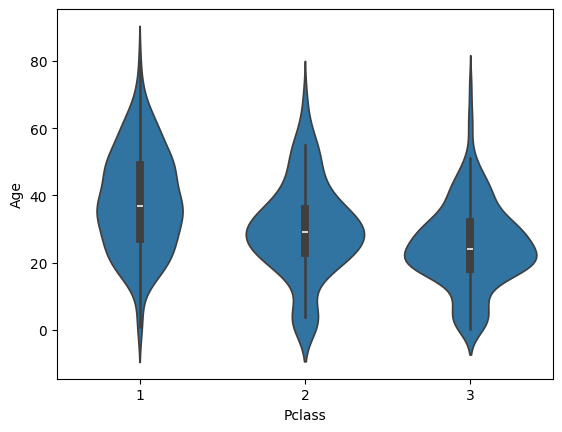

In [ ]:
# 연속값의 분포도 (히스토그램과 비슷)

sns.violinplot(x = 'Pclass', y = 'Age', data = train)

# 가운데 검정 박스는 25,50,75%

# 히스토그램과 달리 x축 카테고리 별로 분포를 비교할 때

<Axes: xlabel='Pclass', ylabel='Age'>

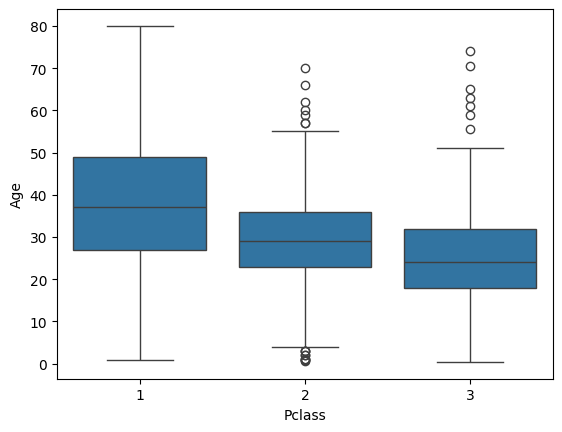

In [ ]:
sns.boxplot(y = 'Age', x = 'Pclass', data = train)

# 바이올린 플랏의 검정 박스만 뽑은 것

<Axes: xlabel='Age', ylabel='Fare'>

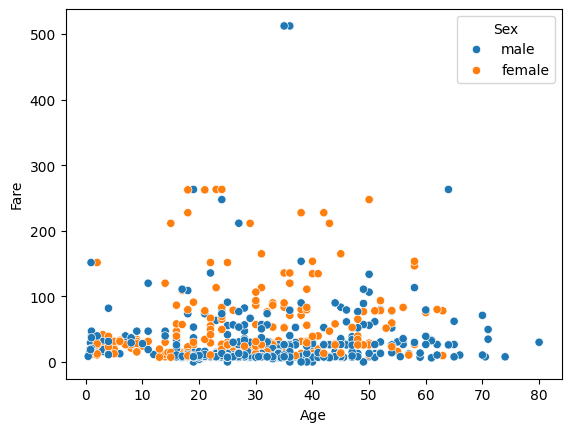

In [128]:
# 산포도

sns.scatterplot(x = 'Age', y = 'Fare', hue ='Sex',  data = train)

# x,y 축 모두 연속형
# outlier 파악에 용이

In [ ]:
# 히트맵 - 숫자값의 상관도

train_df =  train[ ['Age', 'Fare','Survived', 'Pclass', 'SibSp', 'Parch']]
train_corr = train_df.corr()
train_corr

# 연속형이 가장 좋음. 
# 분류보다 회귀 모델에서 유용
# 카테고리성 (pclass, SibSp...) 해석을 못할건 아니지만 최고는 아님

,Age,Fare,Survived,Pclass,SibSp,Parch
Age,1.000000,0.096067,-0.077221,-0.369226,-0.308247,-0.189119
Fare,0.096067,1.000000,0.257307,-0.549500,0.159651,0.216225
Survived,-0.077221,0.257307,1.000000,-0.338481,-0.035322,0.081629
Pclass,-0.369226,-0.549500,-0.338481,1.000000,0.083081,0.018443
SibSp,-0.308247,0.159651,-0.035322,0.083081,1.000000,0.414838
Parch,-0.189119,0.216225,0.081629,0.018443,0.414838,1.000000


<Axes: >

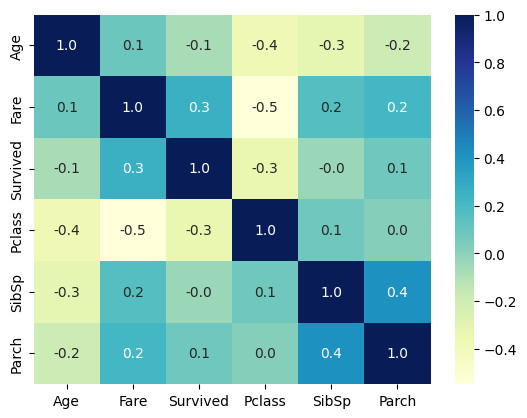

In [147]:
sns.heatmap(train_corr, annot=True, fmt = '.1f', cbar=True, cmap = 'YlGnBu')